# Dynamic Pricing Strategy

In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 10000)
import plotly.express as px
import plotly.graph_objects as go

In [141]:
data = pd.read_csv('dynamic_pricing.csv')

In [142]:
data.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


# EXPLORATORY DATA ANALYSIS

In [144]:
data.shape

(1000, 10)

In [145]:
data.columns

Index(['Number_of_Riders', 'Number_of_Drivers', 'Location_Category',
       'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings',
       'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration',
       'Historical_Cost_of_Ride'],
      dtype='object')

In [146]:
data.dtypes

Number_of_Riders             int64
Number_of_Drivers            int64
Location_Category           object
Customer_Loyalty_Status     object
Number_of_Past_Rides         int64
Average_Ratings            float64
Time_of_Booking             object
Vehicle_Type                object
Expected_Ride_Duration       int64
Historical_Cost_of_Ride    float64
dtype: object

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


In [148]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_Riders,1000.0,60.372000,23.701506,20.000000,40.000000,60.000000,81.000000,100.000000
Number_of_Drivers,1000.0,27.076000,19.068346,5.000000,11.000000,22.000000,38.000000,89.000000
Number_of_Past_Rides,1000.0,50.031000,29.313774,0.000000,25.000000,51.000000,75.000000,100.000000
Average_Ratings,1000.0,4.257220,0.435781,3.500000,3.870000,4.270000,4.632500,5.000000
Expected_Ride_Duration,1000.0,99.588000,49.165450,10.000000,59.750000,102.000000,143.000000,180.000000
Historical_Cost_of_Ride,1000.0,372.502623,187.158756,25.993449,221.365202,362.019426,510.497504,836.116419


In [149]:
data.isnull().sum()

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

In [150]:
data.duplicated().sum()

0

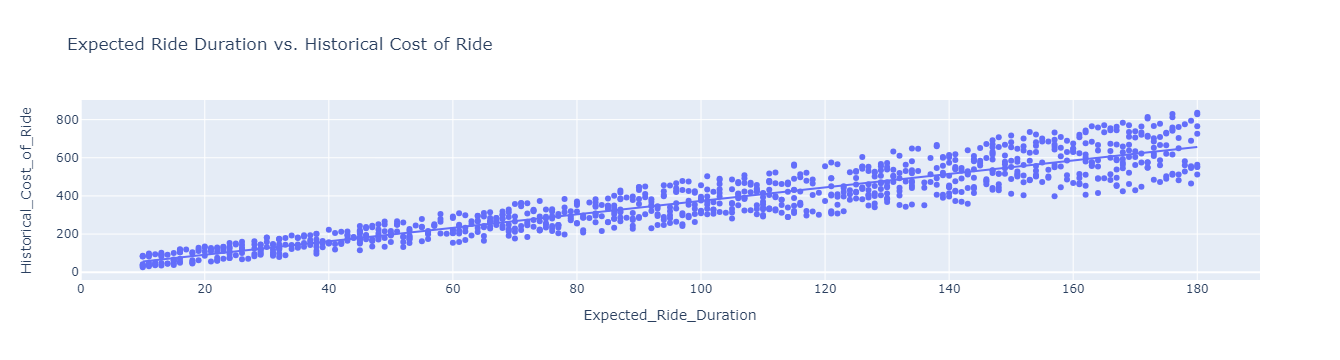

In [151]:
fig = px.scatter(data, x = 'Expected_Ride_Duration', y = 'Historical_Cost_of_Ride', title = 'Expected Ride Duration vs. Historical Cost of Ride', trendline = 'ols')

fig.show()

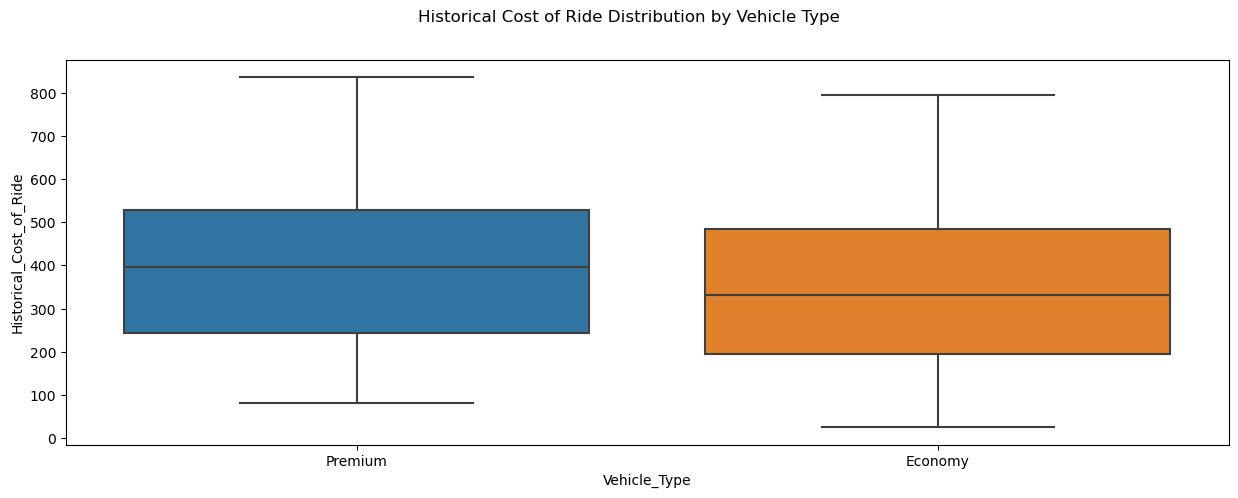

In [152]:
plt.figure(figsize = (15, 5))
plt.suptitle('Historical Cost of Ride Distribution by Vehicle Type')
sns.boxplot(data = data, x = 'Vehicle_Type', y = 'Historical_Cost_of_Ride')
plt.show()

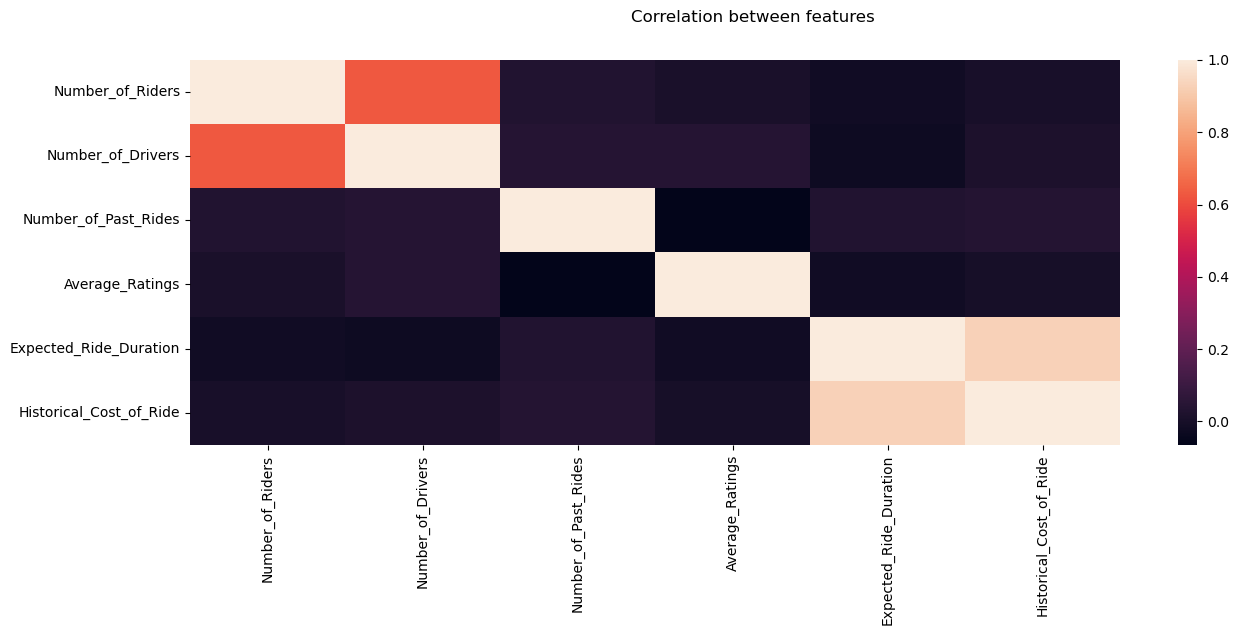

In [153]:
plt.figure(figsize = (15, 5))
plt.suptitle('Correlation between features')
sns.heatmap(data = data.corr(numeric_only = True))
plt.show()

# IMPLEMENTATING DYNAMIC PRICING STRATEGY

In [155]:
data.head(2)

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753


### calculating demand_multipliler based on percentile for high and low demand

In [157]:
high_demand_percentile = 75
low_demand_percentile = 25

In [158]:
data['demand_multiplier'] = np.where(data['Number_of_Riders'] > np.percentile(data['Number_of_Riders'], high_demand_percentile),
                                    data['Number_of_Riders'] / np.percentile(data['Number_of_Riders'], high_demand_percentile),
                                    data['Number_of_Riders'] / np.percentile(data['Number_of_Riders'], low_demand_percentile))

### calculating supply_multiplier based on percentile for high and low demand

In [160]:
high_supply_percentile = 75
low_supply_percentile = 25

In [161]:
data['supply_multiplier'] = np.where(data['Number_of_Drivers'] > np.percentile(data['Number_of_Drivers'], low_supply_percentile),
                                     np.percentile(data['Number_of_Drivers'], high_supply_percentile) / data['Number_of_Drivers'],
                                     np.percentile(data['Number_of_Drivers'], low_supply_percentile) / data['Number_of_Drivers'])

### Adjustments factors for high and low demand/supply

In [163]:
demand_threshold_high = 1.2
demand_threshold_low = 0.8
supply_threshold_high = 0.8
supply_threshold_low = 1.2

In [164]:
data['adjusted_ride_cost'] = data['Historical_Cost_of_Ride'] * (np.maximum(data['demand_multiplier'], demand_threshold_low) * np.maximum(data['supply_multiplier'], supply_threshold_high))

In [165]:
data.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,demand_multiplier,supply_multiplier,adjusted_ride_cost
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,1.111111,0.844444,266.710528
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,1.450000,0.974359,245.653817
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,1.050000,1.225806,424.478684
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232,1.098765,1.357143,701.155452
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422,1.950000,1.727273,1952.472427


# calculating the profit percentage after implementationg dynamic price strategy

In [167]:
### calculating the profit percentage for each ride

data['profit_percentage'] = ((data['adjusted_ride_cost'] - data['Historical_Cost_of_Ride']) / data['Historical_Cost_of_Ride']) * 100

In [168]:
### identifying the profitable rides where profit percentage is positive

profitable_rides = data[data['profit_percentage'] > 0]

In [169]:
### identifying the loss rides where profit percentage is negative

loss_rides = data[data['profit_percentage'] < 0]

In [170]:
values = [len(profitable_rides), len(loss_rides)]

In [171]:
values

[826, 173]

In [172]:
import matplotlib.pyplot as plt

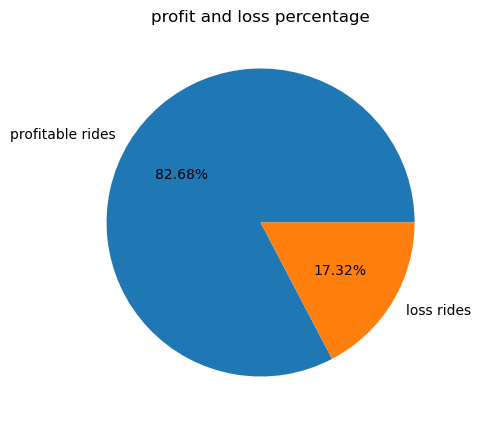

In [173]:
plt.figure(figsize =(10, 5))
plt.title('profit and loss percentage')
plt.pie(values, labels = ['profitable rides', 'loss rides'], autopct = '%.2f%%')
plt.show()

### Relationship between adjusted_ride_cost and ride_duration after dynamic pricing 

In [248]:
import seaborn as sns

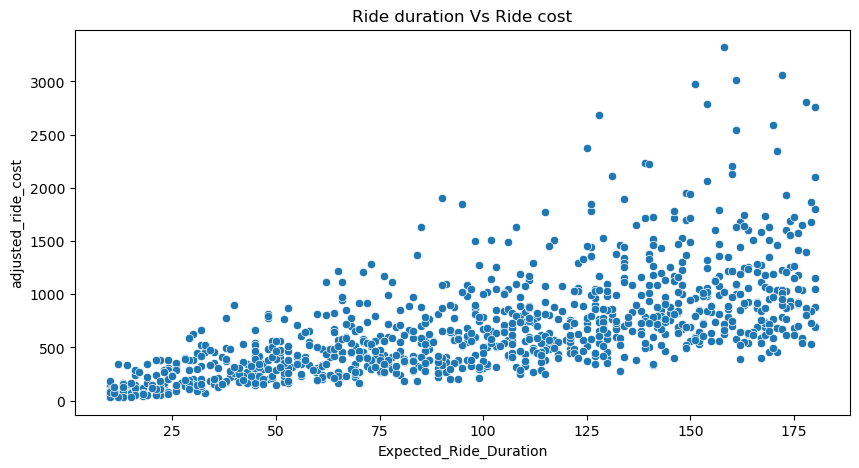

In [254]:
plt.figure(figsize=(10, 5))
plt.title('Ride duration Vs Ride cost')
sns.scatterplot(data = data , x = 'Expected_Ride_Duration', y = 'adjusted_ride_cost')
plt.show()

# Training the neural network

### data preprocessing

In [264]:
def data_preprocessing_pipeline(data):
    
    # identifying numeric and categorical features
    
    numeric_features = data.select_dtypes(include=['float', 'int']).columns
    categorical_features = data.select_dtypes(include=['object']).columns

    # handling missing values in numerical features

    data[numeric_features] = data[numeric_features].fillna(data[numeric_features].mean())

    # handling missing values in categorical features

    data[categorical_features] = data[categorical_features].fillna(data[categorical_features].mode().iloc[0])

    # detecting and handling outliers in numeric features using IQR

    for feature in numeric_features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 - (1.5 * IQR)
        data[feature] = np.where((data[feature] < lower_bound) | (data[feature] > upper_bound), data[feature].mean(), data[feature])


    return data

In [268]:
data['Vehicle_Type'] = data['Vehicle_Type'].map({'Premium' : 1, 'Economy' : 0})

In [270]:
data.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,demand_multiplier,supply_multiplier,adjusted_ride_cost,profit_percentage
0,90,45,Urban,Silver,13,4.47,Night,1,90,284.257273,1.111111,0.844444,266.710528,-6.172840
1,58,39,Suburban,Silver,72,4.06,Evening,0,43,173.874753,1.450000,0.974359,245.653817,41.282051
2,42,31,Rural,Silver,0,3.99,Afternoon,1,76,329.795469,1.050000,1.225806,424.478684,28.709677
3,89,28,Rural,Regular,67,4.31,Afternoon,1,134,470.201232,1.098765,1.357143,701.155452,49.118166
4,78,22,Rural,Regular,74,3.77,Afternoon,0,149,579.681422,1.950000,1.727273,1952.472427,236.818182


### splitting the data into train and test

In [277]:
from sklearn.model_selection import train_test_split

In [284]:
x = data[["Number_of_Riders", "Number_of_Drivers", "Vehicle_Type", "Expected_Ride_Duration"]]

In [286]:
y = data[['adjusted_ride_cost']]

In [288]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [290]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 4), (200, 4), (800, 1), (200, 1))

In [292]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [296]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [300]:
history = model.fit(X_train, y_train, batch_size = 1, epochs = 30)

Epoch 1/30
800/800 [==============================] - 2s 3ms/step - loss: 53101.4297
Epoch 2/30
800/800 [==============================] - 2s 3ms/step - loss: 51669.1016
Epoch 3/30
800/800 [==============================] - 2s 3ms/step - loss: 62247.4531
Epoch 4/30
800/800 [==============================] - 2s 3ms/step - loss: 72018.9531
Epoch 5/30
800/800 [==============================] - 3s 3ms/step - loss: 56197.4688
Epoch 6/30
800/800 [==============================] - 3s 4ms/step - loss: 49065.1484
Epoch 7/30
800/800 [==============================] - 3s 4ms/step - loss: 46825.7031
Epoch 8/30
800/800 [==============================] - 2s 3ms/step - loss: 45898.3242
Epoch 9/30
800/800 [==============================] - 2s 3ms/step - loss: 55405.1094
Epoch 10/30
800/800 [==============================] - 3s 3ms/step - loss: 53720.5781
Epoch 11/30
800/800 [==============================] - 3s 4ms/step - loss: 58311.6641
Epoch 12/30
800/800 [==============================] - 3s 3ms/s

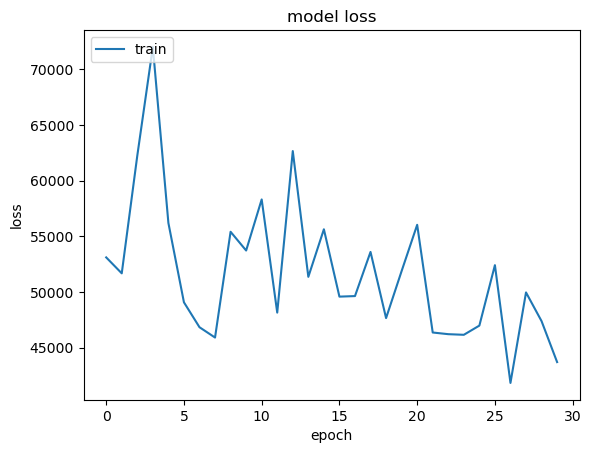

In [302]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [304]:
y_pred = model.predict(X_test)

7/7 [==============================] - 1s 3ms/step


In [311]:
from sklearn.metrics import , mean_squared_error

In [315]:
mean_squared_error(y_test, y_pred)

39517.554349742044

In [321]:
X_test.head()

,Number_of_Riders,Number_of_Drivers,Vehicle_Type,Expected_Ride_Duration
521,38,8,0,114
737,83,18,0,81
740,22,7,1,180
660,29,13,1,87
411,91,14,1,19


In [323]:
y_test.head()

,adjusted_ride_cost
521,614.288912
737,619.571272
740,694.281500
660,626.100667
411,338.825192


# MODEL PREDICTIONS

In [325]:
model.predict([[38, 8, 0, 114]])

1/1 [==============================] - 1s 1s/step


array([[522.0249]], dtype=float32)